In [12]:
import torch
import torchvision as tv
from torch import nn
import matplotlib.pyplot as plt

## Аугментация данных

In [7]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j], cmap='gray')
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    plt.show()

In [8]:
def apply(img, aug, num_rows=2, num_cols=4, scale=2):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

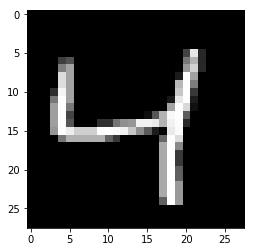

In [13]:
dataset = tv.datasets.MNIST('../data/', train=True, download=True)
img = dataset[2][0]
plt.imshow(img, cmap='gray')

In [14]:
type(img)

PIL.Image.Image

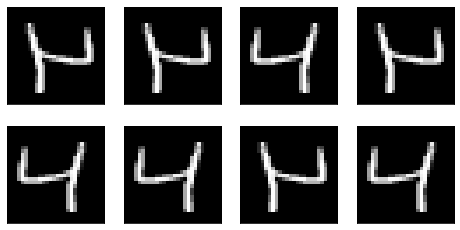

In [15]:
apply(img, tv.transforms.RandomHorizontalFlip())

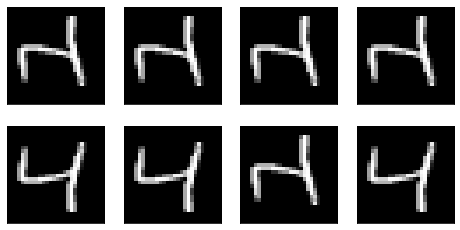

In [16]:
apply(img, tv.transforms.RandomVerticalFlip())

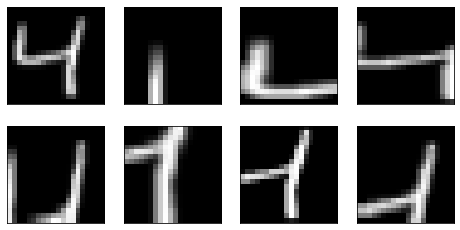

In [17]:
## A crop of random size (default: of 0.08 to 1.0) of the original size and a random aspect ratio
## (default: of 3/4 to 4/3) of the original aspect ratio is made.
## This crop is finally resized to given size. 
apply(img, tv.transforms.RandomResizedCrop((20,20), scale=(0.1, 1.), ratio=(0.5, 2)))

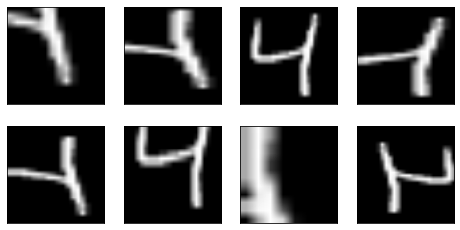

In [18]:
augs = tv.transforms.Compose([
    tv.transforms.RandomHorizontalFlip(),
    tv.transforms.RandomVerticalFlip(),
    tv.transforms.RandomResizedCrop(
        (200, 200), scale=(0.1, 1), ratio=(0.5, 2))])
apply(img, augs)

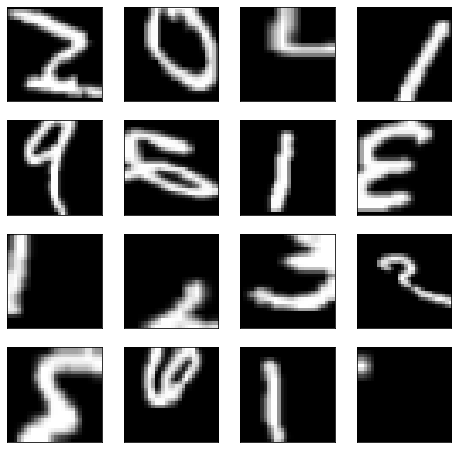

In [19]:
augs = tv.transforms.Compose([
    tv.transforms.RandomHorizontalFlip(),
    tv.transforms.RandomVerticalFlip(),
    tv.transforms.RandomResizedCrop(
        (28, 28), scale=(0.1, 1), ratio=(0.5, 2)),
    tv.transforms.ToTensor()])
dataset = tv.datasets.MNIST('.', train=True, transform=augs, download=True)
loader = torch.utils.data.DataLoader(dataset, batch_size=16)

for X, _ in loader:
    X = X.reshape(16, 28, 28)
    show_images(X, 4, 4)
    break